**Example using FbProphet and airpassengers dataset**

In [5]:
pip install pystan~=2.14

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=29312458 sha256=b07fbe7b7f0254964b66f101aea88e57f48dc2d25643336cb03aa8eebf8e4863
  Stored in directory: /home/marco.todaro/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.17.2-py3-none-any.whl (187 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.11.tar.gz (5.4 MB)
  Using cached hijri_converter-2.2.4-py3-none-any.whl (14 kB)
  Using cached korean_lunar_calendar-0.3.1-py3-none-any.whl (9.0 kB)
  Using cached ephem-4.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  ERROR: Command errored out with exit status 1:
   command: /home/marco.todaro/Applicazioni/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-zl1lgt7r/fbprophet_10d383bdf0684a5a960cb752e8ecebfb/setup.py'"'"'; __file__='"'"'/tmp/pip-install-zl1lgt7r/fbprophet_10d383bdf0684a5a960cb752e8ecebfb/setup.py'"'"';f = getattr(tokenize, '

# Nuova sezione

In [7]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

SyntaxError: invalid syntax (fbprophet.py, line 12)

In [ ]:
# 1. lettura dati
df = pd.read_csv('sample_data/AirPassengers.csv')
print(df.head(5))

     Month  AirPassengers
0  1949-01            112
1  1949-02            118
2  1949-03            132
3  1949-04            129
4  1949-05            121


In [ ]:
# 2.0 tipi di dato e nomi colonne
print(df.dtypes)
df['Month'] = pd.DatetimeIndex(df['Month'])
print(df.dtypes)
df = df.rename(columns={'Month': 'ds', 'AirPassengers': 'y'})
print(df.head(5))

Month            object
AirPassengers     int64
dtype: object
Month            datetime64[ns]
AirPassengers             int64
dtype: object
          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121


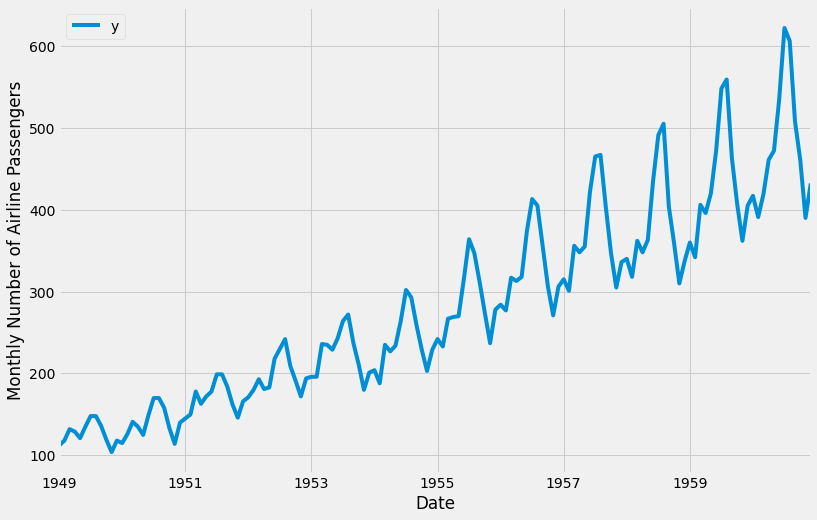

In [ ]:
#3.0 show data
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()


In [ ]:
#4.0 model creation
my_model = Prophet(interval_width=0.95, weekly_seasonality=True)

In [ ]:
#5.0 fit the data
my_model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#6.0 creation of future dataframe
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
print(future_dates.tail())

            ds
175 1963-08-01
176 1963-09-01
177 1963-10-01
178 1963-11-01
179 1963-12-01


In [ ]:
#7.0 forecast
forecast = my_model.predict(future_dates)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds        yhat  yhat_lower  yhat_upper
175 1963-08-01  650.450844  604.052400  694.381617
176 1963-09-01  601.102649  556.212829  642.088124
177 1963-10-01  562.183771  521.000504  608.325862
178 1963-11-01  540.026149  498.720142  583.825854
179 1963-12-01  562.642127  519.477749  608.567343


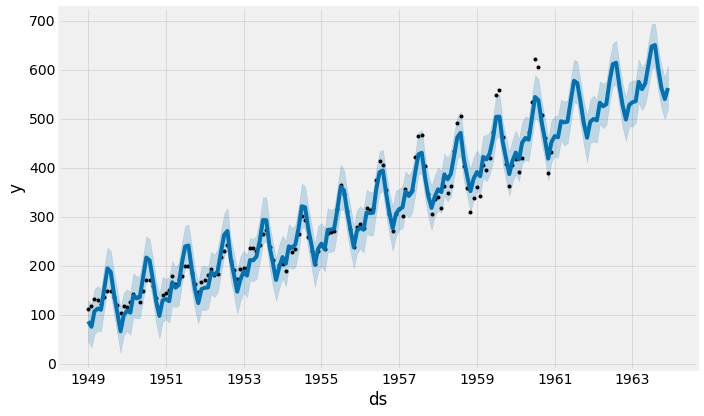

In [ ]:
#8.0 plot of the forecast
plt2 = my_model.plot(forecast, uncertainty=True)
plt2.show()

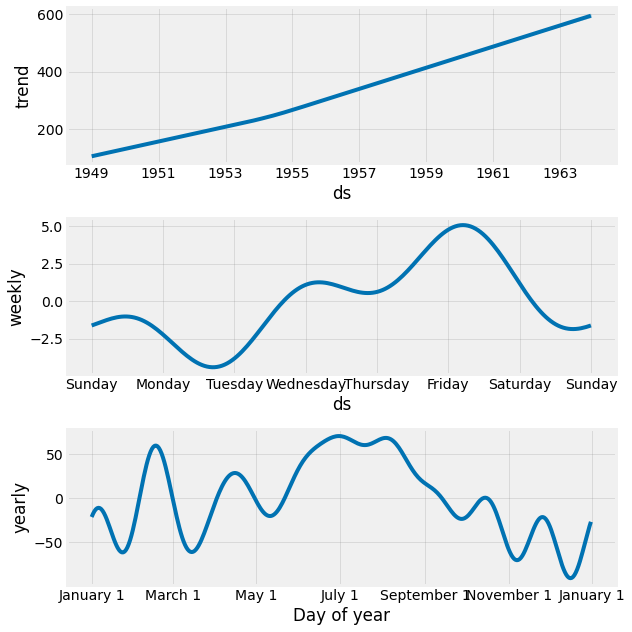

In [ ]:
plt3 = my_model.plot_components(forecast)
plt3.show()